***IMPORTING PACKAGES***
  
  1. **pandas** - data manipulation and analysis
  2. **matplotlib** - data visualization
  3. **scikit-learn** - machine learning models

    3.1. Logistic Regression

    3.2. K-Nearest Neighbors
    
    3.3. Random Forest

In [ ]:
#Import the relevant libraries
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score

## **DEFAULT OF CREDIT CARD CLIENTS**


Yeh,I-Cheng. (2016). default of credit card clients. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.

*Dataset* information:

* 30,000 rows
* Amount of the given credit
* Gender
* Education
* Marital Status
* Age
* History of Payments





In [ ]:
# Call the dataset
dataset_path = 'Credit_Card_Default_Clean.csv'
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
data.head()

# Verify data types after conversion
# print(data.dtypes)

In [ ]:
#Partition data into X and Y
y = data['default']
x = data.drop('default', axis=1)

x.head()

Split the dataset into training data (80%) and test data (20%).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## **MACHINE LEARNING MODELS**

1. [K-Nearest Neighbors](https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4#:~:text=K%2Dnearest%20neighbors%20(KNN),closet%20to%20the%20test%20data.)
- K-nearest neighbors (KNN) is a type of supervised learning algorithm used for both regression and classification. KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closet to the test data. The KNN algorithm calculates the probability of the test data belonging to the classes of ‘K’ training data and class holds the highest probability will be selected. In the case of regression, the value is the mean of the ‘K’ selected training points.



2. [Random Forest](https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems.)
- The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. Feature randomness, also known as feature bagging or “the random subspace method”(link resides outside ibm.com), generates a random subset of features, which ensures low correlation among decision trees.



3. [Logistic Regression](https://www.ibm.com/topics/logistic-regression?mhsrc=ibmsearch_a&mhq=logistic%20regression)
- estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure.

In [ ]:
#Create an instance
names = ["Nearest_Neighbors_3_uniform",
         "Nearest_Neighbors_3_distance",
         "Nearest_Neighbors_5_uniform",
         "Nearest_Neighbors_5_distance",
         "Random_Forest_3_gini",
         "Random_Forest_3_entropy",
         "Random_Forest_3_log_loss",
         "Random_Forest_5_gini",
         "Random_Forest_5_entropy",
         "Random_Forest_5_log_loss",
         "Logistic_Regression"]

classifiers = [
    KNeighborsClassifier(n_neighbors=3, weights="uniform"),
    KNeighborsClassifier(n_neighbors=3, weights="distance"),
    KNeighborsClassifier(n_neighbors=5, weights="uniform"),
    KNeighborsClassifier(n_neighbors=5, weights="distance"),
    RandomForestClassifier(max_depth=3, criterion="gini"),
    RandomForestClassifier(max_depth=3, criterion="entropy"),
    RandomForestClassifier(max_depth=3, criterion="log_loss"),
    RandomForestClassifier(max_depth=5, criterion="gini"),
    RandomForestClassifier(max_depth=5, criterion="entropy"),
    RandomForestClassifier(max_depth=5, criterion="log_loss"),
    # LogisticRegression(max_iter=3000, random_state=42),
    # LogisticRegression(max_iter=5000, random_state=42),
    LogisticRegression(max_iter=1000, random_state=42)]

#Fit model on training data
scores = []
cms = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    cm = name, confusion_matrix(y_test, prediction, labels=clf.classes_)
    cms.append(cm)
    # score = clf.score(x_test, y_test)
    # Calculate accurancy
    accuracy = accuracy_score(y_test, prediction)
    # Calculate precision
    precision = precision_score(y_test, prediction, average="weighted")
    # Calculate recall
    recall = recall_score(y_test, prediction, average="weighted")

    score = name, accuracy, precision, recall

    scores.append(score)

In [ ]:
pd.set_option('display.max_rows', 15)
df = pd.DataFrame(scores, columns=['name', 'accuracy','precision','recall'])
df

## **CONFUSION MATRIX**

Conditions for default payment; a value of 1 indicates for a default and 0 for on track payment (Yes = 1, No = 0)

In [ ]:
for cm in cms:
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Yes Default'])
    cm_disp.plot()
    # visualize the confusion matrix


### **RESULTS**

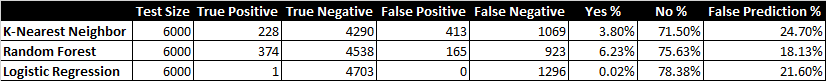

This table illustrates the performance of the three learning models on the dataset. We can see that all of them only predicted 'Yes' or the number of users having default payment ranging from 0.02% to 6.23%, of which the actual dataset had approx. 23%. Oddly enough, the models predicted 'No' values closeyl to the actual dataset's approx. 77%. A noteworthy result by the Logistic Regression model having a constant value of 1 for the True Positive, and 0 for the False Positive predictions. This behavior makes us rethink and reevaluate a model's compatibility or usability on certain datasets.

**MODEL PERFORMANCE ANALYSIS**


1.   Upon implementation of the three models, three features were observed: accuracy, precision, and recall. K-Nearest Neighbor yielded average 74.11% accuracy, 70.21% precision, and 74.11% recall. Random Forest yielded average 81.28% accuracy, precision 79.32%, and 81.28% recall. Logistic Regression yielded average 78.46% accuracy, 83.10% precision, and 78.46% recall.

2.  After comparing ang analyzing the confusion matrices of the three machine learning models, we have decided to drop Logistic Regression as is only Predicted a True Positive value of "1", contrary to the ~23% overall predicted payment default feature of the dataset. For this reason, we deduced that Logistic Regression may not be fit for our chosen dataset.

3.  Finally with the K-Nearest Neighbor and Random Forest, we safely assume that Random Forest's implementation performed better compared to the other having higher values for the True positive values and higher accuracy, precision, and recall, after checking the model's scores compared with the others.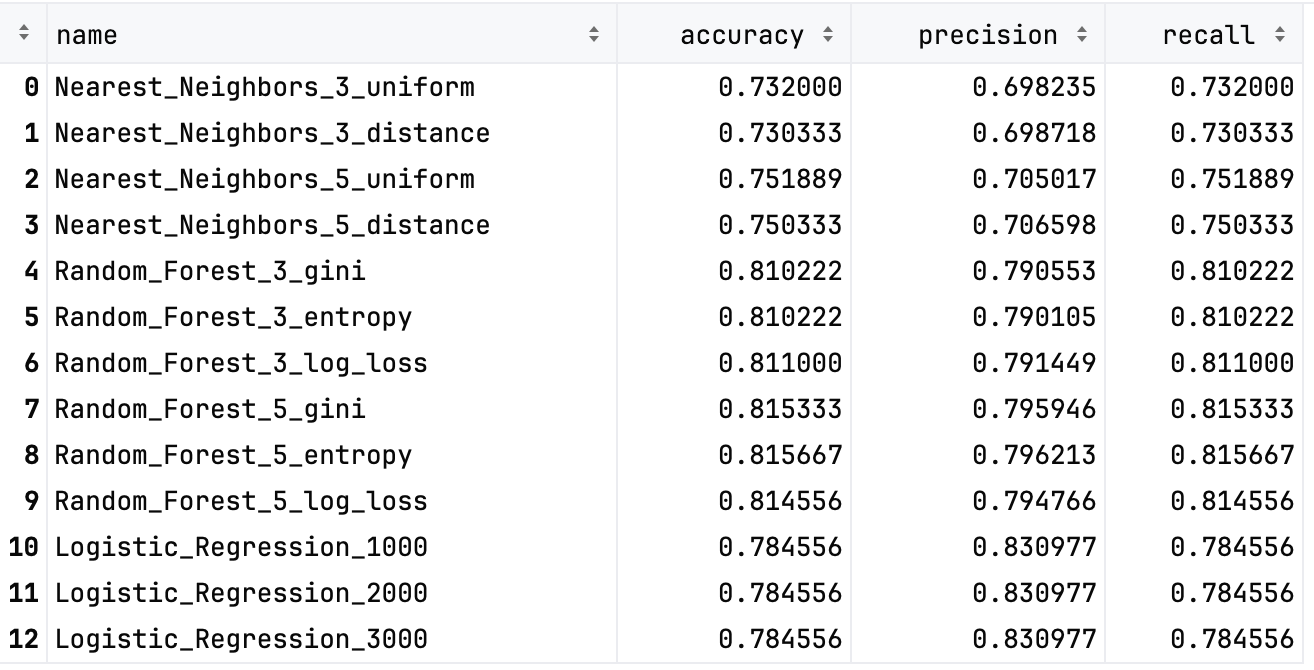

